In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# List of 10 cryptocurrency symbols
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'XRP-USD', 'ADA-USD', 'DOT-USD', 'BCH-USD', 'BNB-USD', 'LINK-USD', 'DOGE-USD']

# Loop to download data and generate dataset names
for cryptocurrency in cryptocurrencies:
    # Generate a dataset name based on the cryptocurrency symbol
    base_name = cryptocurrency.split('-')[0]  # 'BTC', 'ETH', etc.

    # Download historical data for the cryptocurrency
    data = yf.download(cryptocurrency, group_by='Ticker', period='max')

    # Generate different datasets for daily, weekly, monthly, quarterly data
    for frequency in ['daily', 'weekly', 'monthly', 'quarterly']:
        name = f'df_{base_name}_{frequency}'  # Create the dataset name
        print(f'Name of our dataset : {name}')

        if frequency == 'daily':
            resampled_data = data
        elif frequency == 'weekly':
            resampled_data = data.resample('W').mean()
        elif frequency == 'monthly':
            resampled_data = data.resample('M').mean()
        elif frequency == 'quarterly':
            resampled_data = data.resample('Q').mean()

        # Store the dataset in the global namespace
        globals()[name] = resampled_data


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_BTC_daily
Name of our dataset : df_BTC_weekly
Name of our dataset : df_BTC_monthly
Name of our dataset : df_BTC_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_ETH_daily
Name of our dataset : df_ETH_weekly
Name of our dataset : df_ETH_monthly
Name of our dataset : df_ETH_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_LTC_daily
Name of our dataset : df_LTC_weekly
Name of our dataset : df_LTC_monthly
Name of our dataset : df_LTC_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_XRP_daily
Name of our dataset : df_XRP_weekly
Name of our dataset : df_XRP_monthly
Name of our dataset : df_XRP_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_ADA_daily
Name of our dataset : df_ADA_weekly
Name of our dataset : df_ADA_monthly
Name of our dataset : df_ADA_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_DOT_daily
Name of our dataset : df_DOT_weekly
Name of our dataset : df_DOT_monthly
Name of our dataset : df_DOT_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_BCH_daily
Name of our dataset : df_BCH_weekly
Name of our dataset : df_BCH_monthly
Name of our dataset : df_BCH_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_BNB_daily
Name of our dataset : df_BNB_weekly
Name of our dataset : df_BNB_monthly
Name of our dataset : df_BNB_quarterly


[*********************100%***********************]  1 of 1 completed


Name of our dataset : df_LINK_daily
Name of our dataset : df_LINK_weekly
Name of our dataset : df_LINK_monthly
Name of our dataset : df_LINK_quarterly


[*********************100%***********************]  1 of 1 completed

Name of our dataset : df_DOGE_daily
Name of our dataset : df_DOGE_weekly
Name of our dataset : df_DOGE_monthly
Name of our dataset : df_DOGE_quarterly


In [ ]:
# Check for null values in the entire dataset
null_values = data.isnull().sum()
print("Null values in dataset:")
print(null_values)

# Example: Filter the data for BTC-USD and display the first 5 rows
df_BTC_daily = globals()['df_BTC_daily']
print("BTC-USD daily data:")
print(df_BTC_daily.head())

Null values in dataset:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
BTC-USD daily data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


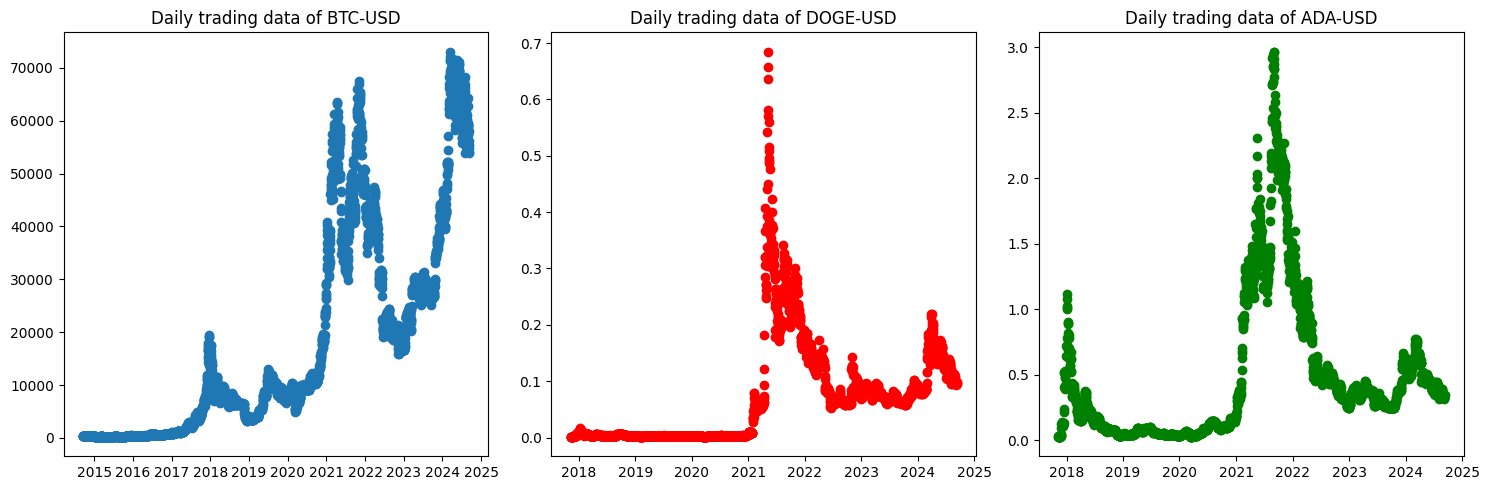

In [ ]:
# Plotting daily data for BTC-USD, DOGE-USD, and ADA-USD
df_DOGE_daily = globals()['df_DOGE_daily']
df_ADA_daily = globals()['df_ADA_daily']

x1, y1 = df_BTC_daily.index, df_BTC_daily['Close']
x2, y2 = df_DOGE_daily.index, df_DOGE_daily['Close']
x3, y3 = df_ADA_daily.index, df_ADA_daily['Close']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(x1, y1)
axes[0].set_title('Daily trading data of BTC-USD')

axes[1].scatter(x2, y2, color='red')
axes[1].set_title('Daily trading data of DOGE-USD')

axes[2].scatter(x3, y3, color='green')
axes[2].set_title('Daily trading data of ADA-USD')

plt.tight_layout()
plt.show()

In [ ]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(symbol, threshold=3.5):
    df_name = f'df_{symbol}_daily'
    try:
        data = globals()[df_name]['Close']
    except KeyError:
        raise ValueError(f"DataFrame '{df_name}' not found. Ensure the symbol is correct and data is loaded.")

    mean = data.mean()
    std_dev = data.std()
    z_scores = np.abs((data - mean) / std_dev)

    non_outliers = data[z_scores <= threshold]
    outliers = data[z_scores > threshold]

    return non_outliers, outliers

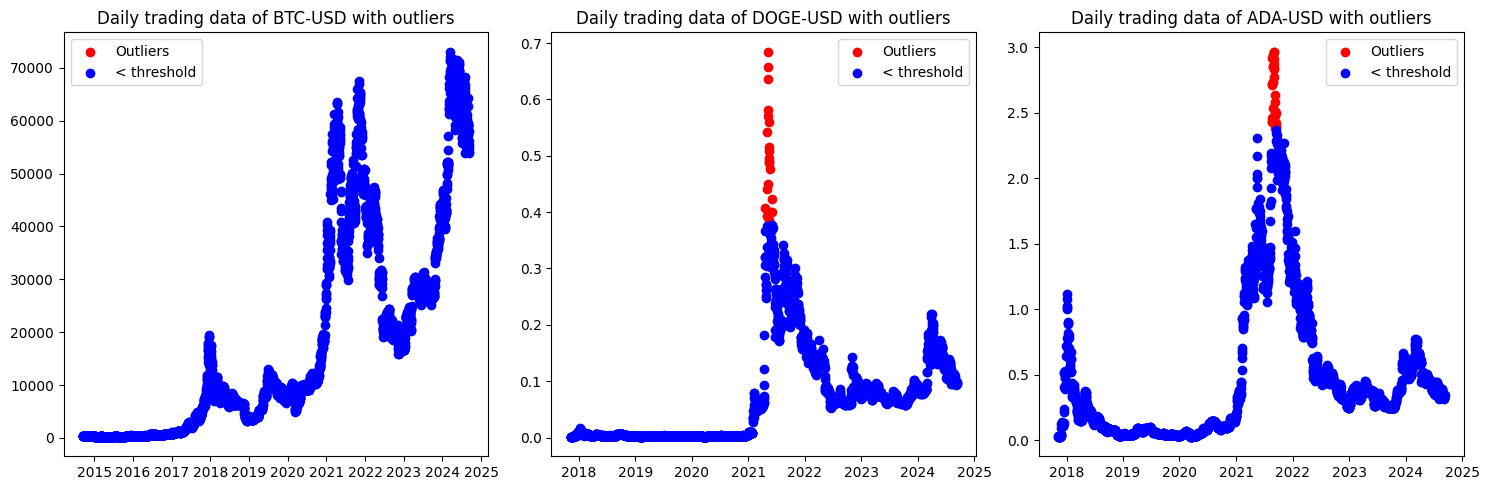

In [ ]:
# Set the threshold for outliers detection and plot
threshold = 3.5
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

filtered_data, outliers = detect_outliers_zscore('BTC', threshold)
axes[0].scatter(outliers.index, outliers, color='red', label='Outliers')
axes[0].scatter(filtered_data.index, filtered_data, color='blue', label='< threshold')
axes[0].set_title('Daily trading data of BTC-USD with outliers')
axes[0].legend()

filtered_data, outliers = detect_outliers_zscore('DOGE', threshold)
axes[1].scatter(outliers.index, outliers, color='red', label='Outliers')
axes[1].scatter(filtered_data.index, filtered_data, color='blue', label='< threshold')
axes[1].set_title('Daily trading data of DOGE-USD with outliers')
axes[1].legend()

filtered_data, outliers = detect_outliers_zscore('ADA', threshold)
axes[2].scatter(outliers.index, outliers, color='red', label='Outliers')
axes[2].scatter(filtered_data.index, filtered_data, color='blue', label='< threshold')
axes[2].set_title('Daily trading data of ADA-USD with outliers')
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Function to replace outliers using Z-score
def replace_outliers_zscore(symbol, threshold):
    df_name = f'df_{symbol}_daily'
    try:
        data = globals()[df_name]
    except KeyError:
        raise ValueError(f"DataFrame '{df_name}' not found. Ensure the symbol is correct and data is loaded.")

    close_mean = data['Close'].mean()
    z_scores = np.abs((data['Close'] - close_mean) / data['Close'].std())

    for i in range(len(data)):
        if z_scores.iloc[i] > threshold:
            if data['Close'].iloc[i] < 1:
                data['Close'].iloc[i] = close_mean
            else:
                data['Close'].iloc[i] = data['Close'].iloc[i] ** (1/3)

    return data


<ipython-input-8-05e339938303>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'].iloc[i] = close_mean
<ipython-input-8-05e339938303>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'].iloc[i] = close_mean
<ipython-input-8-05e339938303>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'].iloc[i] = close_mean
<ipython-input-8-05e339938303>:15: SettingWithCopyWarning: 
A value is trying to be set on 

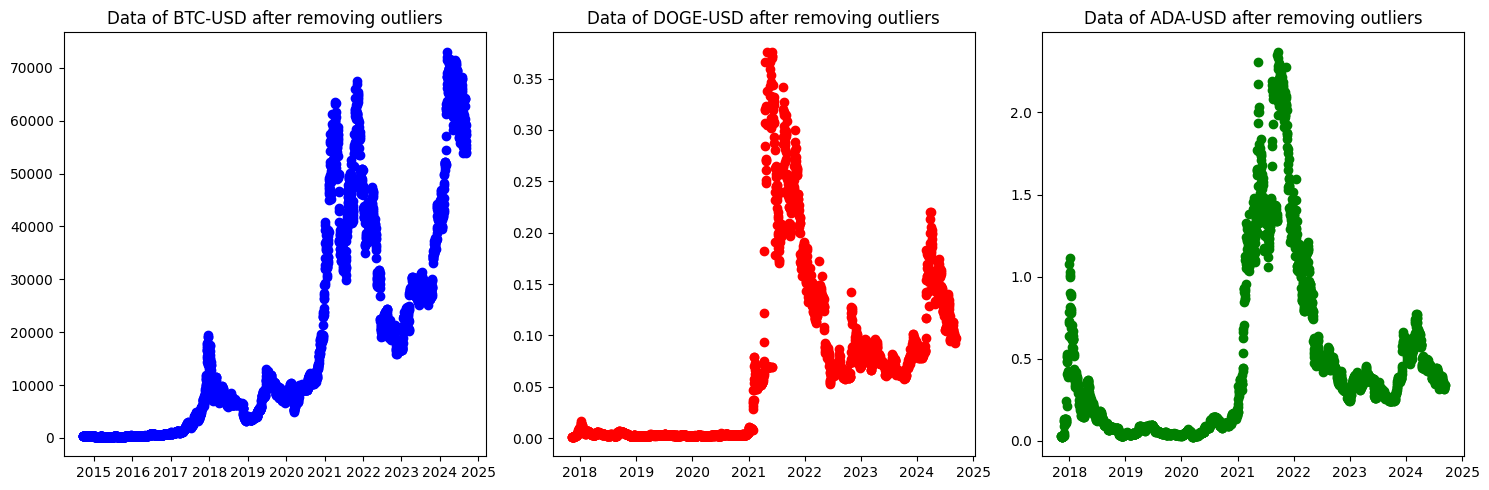

In [ ]:
# Apply the outlier replacement function to the desired cryptocurrencies
for symbol in ['BTC', 'DOGE', 'ADA']:
    globals()[f'df_{symbol}_daily'] = replace_outliers_zscore(symbol, threshold)

# Plotting data after outlier replacement
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].scatter(df_BTC_daily.index, df_BTC_daily['Close'], color='blue')
axes[0].set_title('Data of BTC-USD after removing outliers')

axes[1].scatter(df_DOGE_daily.index, df_DOGE_daily['Close'], color='red')
axes[1].set_title('Data of DOGE-USD after removing outliers')

axes[2].scatter(df_ADA_daily.index, df_ADA_daily['Close'], color='green')
axes[2].set_title('Data of ADA-USD after removing outliers')

plt.tight_layout()
plt.show()

In [ ]:
# Function to check and correct the resampled DataFrame
def df_checker(df, freq):
    if not isinstance(df.index, pd.DatetimeIndex):
        df.set_index(pd.to_datetime(df['Date']), inplace=True)

    df = df.apply(pd.to_numeric, errors='coerce')
    new_df = df.resample(freq).mean()

    return new_df.iloc[:-1] if new_df.index[-1] > df.index[-1] else new_df


In [ ]:

# Lists to store the resampled DataFrames
weekly_dfs, monthly_dfs, quarterly_dfs = [], [], []

In [ ]:
# Iterate over the list of cryptocurrency symbols
for name in cryptocurrencies:
    base_name = name.split('-')[0]  # 'BTC', 'ETH', etc.
    df = globals()[f'df_{base_name}_daily']  # Access the DataFrame with the correct name

    for freq, freq_name, storage in zip(['W', 'M', 'Q'], ['weekly', 'monthly', 'quarterly'],
                                        [weekly_dfs, monthly_dfs, quarterly_dfs]):
        new_name = f'df_{base_name}_{freq_name}'
        globals()[new_name] = df_checker(df, freq)
        storage.append(globals()[new_name])


TRAIN TEST


In [ ]:
# we are using 70% of our data for training and 30% for testing
def train_test_split(coin, freq):
    data = globals()[f'df_{coin}_{freq}']
    split_row = floor(0.7*data.shape[0])
    training_data = data[:split_row]
    testing_data = data[split_row: ]

    return training_data, testing_data

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving lstm_model.h5 to lstm_model.h5


### **GUI**

In [ ]:
def lstm_prediction_maker(coin, days_ahead, time_steps=20):
    df = globals()[f'df_{coin}_daily'].copy()  # Adjust the DataFrame name based on your previous code
    latest_date = df.index[-1]  # Get the latest date in the dataset
    predictions = []
    mms = MinMaxScaler()

    # Scale the 'Close' prices
    df['mms_close'] = mms.fit_transform(np.array(df['Close']).reshape(-1, 1))

    # Prepare the initial sequence of time_steps to feed into the model
    temp_data = np.array(df['mms_close'].iloc[-time_steps:])

    # Access the LSTM model using the coin symbol
    model = globals()[f'{coin}_lstm_daily']

    # Generate predictions for the specified number of days ahead
    for i in range(days_ahead):
        prediction = model.predict(temp_data.reshape(1, time_steps), verbose=0)
        temp_data = np.append(temp_data, [prediction[0][0]])[-time_steps:]  # Update the input data with the prediction
        predictions.append(float(prediction[0][0]))

    # Convert predictions back to the original scale
    predictions_inverse = mms.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # Create a date range starting from the latest date in the historical data
    date_range = pd.date_range(start=latest_date, periods=days_ahead, freq='D', name='Date')

    # Create a Pandas Series with the predicted prices
    prediction_df = pd.Series(predictions_inverse, index=date_range)

    return prediction_df


In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [ ]:
from math import floor
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# final ARIMA models
freq = 'weekly'

weekly_arima_params = {
    'BTC' : (5,1,4),
    'ETH': (3,1,2),
    'LTC': (2,1,2),
    'XRP': (1,1,2),
    'ADA': (0,1,1),
    'DOT': (2,1,2),
    'BCH': (2,1,2),
    'BNB': (2,1,3),
    'LINK': (2,1,2),
    'DOGE': (2,1,1),
}

# takes approximately 5 minutes to run
for coin, params in weekly_arima_params.items():
    train, test = train_test_split(coin, freq)
    model_name = f'{coin}_arima_{freq}'
    globals()[model_name] = ARIMA(train.Close, order=params).fit()
    print(f'{coin} training done !')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BTC training done !
ETH training done !
LTC training done !
XRP training done !
ADA training done !
DOT training done !
BCH training done !
BNB training done !
LINK training done !
DOGE training done !


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
def profit_loss_calculator(crypto_symbol, target_date):
    current_date = datetime.now().date()
    days_until_target = (target_date.date() - current_date).days

    if days_until_target >= 20:
        frequency = 'weekly'
        num_periods_ahead = int(round(days_until_target / 7))
        remainder_days = days_until_target % 7

        predicted_values = model_predictor(crypto_symbol, target_date, frequency, num_periods_ahead)

        projected_profit = predicted_values.iloc[-1] - predicted_values.iloc[0]

        if predicted_values.index[-1] > target_date:
            if projected_profit > 0:
                projected_profit -= (projected_profit / remainder_days)
            else:
                projected_profit += (projected_profit / remainder_days)
        else:
            projected_profit += (projected_profit / remainder_days)

    else:
        frequency = 'daily'
        num_periods_ahead = days_until_target
        predicted_values = model_predictor(crypto_symbol, target_date, frequency, num_periods_ahead)
        projected_profit = predicted_values.iloc[-1] - predicted_values.iloc[0]

    return projected_profit, num_periods_ahead, frequency, predicted_values


In [ ]:
def coin_recommendation(future_date, target_profit):
    print(f"Received future_date: {future_date}, target_profit: {target_profit}")
    target_profit = int(target_profit)
    day, month, year = [int(part) for part in future_date.split('-')]
    print(f"Parsed Date - Day: {day}, Month: {month}, Year: {year}")
    future_date = datetime(year, month, day)



In [ ]:
# import pandas as pd

# # Sample data for illustration
# data = {
#     'Date': pd.date_range(start='2019-01-01', periods=100, freq='D'),
#     'Price': range(100)
# }

# # Create a DataFrame
# cryptocurrencies = pd.DataFrame(data)

# # Display the date range
# print(cryptocurrencies['Date'].min(), cryptocurrencies['Date'].max())


In [ ]:
!pip install gradio

**Predict future price**

In [ ]:
import os
import gradio as gr
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError  # Import MSE

# Use base symbols like 'BTC', 'ETH' (these match your DataFrame names like df_BTC_daily)
cryptocurrencies = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE']

# Get the current working directory
current_directory = os.getcwd()

# Build the full path to the model
model_path = os.path.join(current_directory, 'lstm_model.h5')

# Print the model path for debugging
print(f"Model path: {model_path}")

# Load the single LSTM model once, specifying the custom object for 'mse'
lstm_model = load_model(model_path, custom_objects={'mse': MeanSquaredError()})

def is_valid_date(date_text):
    """
    Check if the provided date is valid.
    """
    try:
        datetime.strptime(date_text.strip(), '%Y-%m-%d')  # strip() to handle any extra spaces
        return True
    except ValueError as e:
        print(f"Invalid date: {str(e)}")
        return False

def profit_loss_calculator(symbol, target_date, time_steps=60):
    """
    Calculate profit and forecasted values based on real-world historical data and the trained LSTM model.
    """
    # Retrieve the relevant data for the symbol (e.g., 'BTC')
    try:
        data_frame = globals()[f'df_{symbol}_daily'].copy()
        print(f"Data loaded for {symbol}: {data_frame.shape[0]} rows.")  # Debug print
    except KeyError:
        print(f"No data found for {symbol}.")  # Debugging message for missing data
        return None, 0, 'daily', pd.Series([])

    # Ensure that there is enough data for the prediction
    if data_frame is None or len(data_frame) == 0:
        return None, 0, 'daily', pd.Series([])

    # Use the last available date in the historical data
    last_known_date = data_frame.index[-1]
    print(f"Last known date in the data for {symbol}: {last_known_date}")  # Debug print

    # Check if the target date is after the last available date
    if target_date <= last_known_date:
        print(f"Target date is before or equal to last known date for {symbol}.")  # Debug print
        return None, 0, 'daily', pd.Series([])

    # Get the last known closing price from historical data
    close_data = data_frame['Close'].values.reshape(-1, 1)

    # Normalize the data using MinMaxScaler (as typically used with LSTM)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_data)

    # Prepare the data for LSTM prediction
    last_sequence = scaled_data[-time_steps:]  # Take the last `time_steps` data points for prediction

    # Generate future dates from the last known date to the target date
    future_dates = pd.date_range(last_known_date, target_date, freq='D')[1:]
    days_ahead = len(future_dates)
    print(f"Predicting {days_ahead} days ahead for {symbol}.")  # Debug print

    # Predict the next `days_ahead` future prices using the loaded LSTM model
    predictions = []
    temp_data = last_sequence

    for i in range(days_ahead):
        prediction = lstm_model.predict(temp_data.reshape(1, time_steps, 1), verbose=0)
        predictions.append(prediction[0][0])
        temp_data = np.append(temp_data, prediction)[-time_steps:]  # Update the input sequence

    # Convert the predictions back to the original scale
    forecasted_values = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # Create a Pandas Series with forecasted values for the future dates
    forecasted_values_series = pd.Series(forecasted_values, index=future_dates)

    # Calculate profit as the difference between the first and last forecasted price
    profit = forecasted_values_series.iloc[-1] - forecasted_values_series.iloc[0]

    return profit, len(future_dates), 'daily', forecasted_values_series

def profit_prediction_plotter(crypto_symbol, target_date):
    """
    Main function to plot the forecasted data and return the estimated profit.
    """
    # Validate the target date format
    if not is_valid_date(target_date):
        return None, "Invalid date format or non-existent date. Please enter a valid date in yyyy-mm-dd format."

    # Handle date parsing directly with strptime and ensure there are no hidden characters
    try:
        target_date = datetime.strptime(target_date.strip(), '%Y-%m-%d')  # strip() removes any extra spaces
    except ValueError as e:
        return None, f"Invalid date: {str(e)}"

    # Ensure the correct DataFrame is accessed (e.g., 'df_BTC_daily')
    base_symbol = crypto_symbol  # Already in the correct form (like 'BTC')

    # Call the profit/loss function to get predictions and profit
    profit, steps_ahead, time_frame, forecasted_values = profit_loss_calculator(base_symbol, target_date)

    # If there's no data or prediction, return an error message
    if forecasted_values is None or len(forecasted_values) == 0:
        return None, "No forecasted data available."

    # Retrieve the relevant data from globals (use the base symbol to get the DataFrame)
    data_frame = globals()[f'df_{base_symbol}_daily'].copy()

    # Set the plot title
    plt.title(f'{crypto_symbol} Currency Forecast')

    # Determine the look-back period for plotting historical data
    look_back_period = steps_ahead * 3 if steps_ahead * 3 < len(data_frame) else len(data_frame)
    plt.plot(data_frame.Close[-look_back_period:], label='Historical Data')

    # Plot the predictions
    plt.plot(forecasted_values.index, forecasted_values.values, linestyle='--', label='Forecasted Data')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=30)
    plt.show()

    # Save the plot to an in-memory buffer as an image
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    plt.close()

    # Return the plot and profit as output
    return np.array(Image.open(buffer)), str(profit)

# Create an interface using Gradio
app4 = gr.Interface(
    fn=profit_prediction_plotter,
    inputs=[
        gr.Dropdown(choices=cryptocurrencies, label="Select crypto symbols"),  # Use shorter symbols like 'BTC', 'ETH'
        gr.Textbox(label="Target Date (yyyy-mm-dd)")
    ],
    outputs=[gr.Image(type='numpy', label="Forecasted Plot"), gr.Textbox(label="Estimated Profit")],
    examples=[["BTC", "2024-12-31"], ["ETH", "2025-01-01"]]
)

# Launch the Gradio app
# app4.launch(share=True)





Model path: /content/lstm_model.h5


**Coin Suggestor**


In [ ]:
import os
import gradio as gr
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
import io
from PIL import Image
from concurrent.futures import ThreadPoolExecutor

# Use base symbols like 'BTC', 'ETH' (these match your DataFrame names like df_BTC_daily)
cryptocurrencies = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE']

# Get the current working directory
current_directory = os.getcwd()

# Build the full path to the model
model_path = os.path.join(current_directory, 'lstm_model.h5')

# Check if the model file exists
if os.path.exists(model_path):
    print(f"Model found at {model_path}. Loading the model...")
    # Load the single LSTM model once
    lstm_model = load_model(model_path, custom_objects={'mse': MeanSquaredError()})
else:
    raise FileNotFoundError(f"Model file not found at {model_path}. Please ensure the file exists.")

def is_valid_date(date_text):
    try:
        datetime.strptime(date_text.strip(), '%Y-%m-%d')
        return True
    except ValueError as e:
        print(f"Invalid date: {str(e)}")
        return False

def batch_predict(model, input_data, future_steps):
    """
    Predict the next 'future_steps' days in a single batch, minimizing loop iterations.
    """
    predicted_sequence = []
    temp_input = input_data.copy()

    for _ in range(future_steps):
        # Make a single prediction for the next step
        prediction = model.predict(temp_input.reshape(1, len(temp_input), 1), verbose=0)
        predicted_sequence.append(prediction[0][0])
        # Update the sequence with the new prediction
        temp_input = np.append(temp_input[1:], prediction[0][0])

    return np.array(predicted_sequence)

def profit_loss_calculator(symbol, target_date, time_steps=60):
    try:
        data_frame = globals()[f'df_{symbol}_daily'].copy()
    except KeyError:
        print(f"No data found for {symbol}.")
        return None, 0, 'daily', pd.Series([])

    if data_frame is None or len(data_frame) == 0:
        return None, 0, 'daily', pd.Series([])

    last_known_date = data_frame.index[-1]
    if target_date <= last_known_date:
        print(f"Target date is before or equal to last known date for {symbol}.")
        return None, 0, 'daily', pd.Series([])

    # Prepare data for prediction
    close_data = data_frame['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_data)

    # Get last sequence of time_steps to predict future data
    last_sequence = scaled_data[-time_steps:]
    future_dates = pd.date_range(last_known_date, target_date, freq='D')[1:]
    days_ahead = len(future_dates)

    # Predict future prices in a batch (instead of looping over days)
    predictions = batch_predict(lstm_model, last_sequence, days_ahead)

    # Reverse scale the predictions back to original price values
    forecasted_values = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    forecasted_values_series = pd.Series(forecasted_values, index=future_dates)

    profit = forecasted_values_series.iloc[-1] - forecasted_values_series.iloc[0]

    return profit, len(future_dates), 'daily', forecasted_values_series

def plot_profits(profit_predictions, expected_profit):
    plt.figure(figsize=(12, 6))
    coins = list(profit_predictions.keys())
    profits = list(profit_predictions.values())

    plt.bar(coins, profits)
    plt.axhline(y=expected_profit, color='r', linestyle='--', label='Expected Profit')

    plt.title('Expected Profits by Cryptocurrency')
    plt.xlabel('Cryptocurrency')
    plt.ylabel('Expected Profit/Loss ($)')
    plt.xticks(rotation=45)
    plt.legend()

    # Save plot to a buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    # Convert plot to image
    img = Image.open(buf)
    return img

def coins_suggestor(future_date, expected_profit):
    if not is_valid_date(future_date):
        return "Invalid date format. Please use YYYY-MM-DD format.", None

    try:
        expected_profit = float(expected_profit)
    except ValueError:
        return "Invalid profit value. Please enter a numeric value.", None

    target_date = datetime.strptime(future_date, '%Y-%m-%d')
    current_date = datetime.now()

    if target_date <= current_date:
        return "Target date must be in the future.", None

    profit_predictions = {}
    loss_predictions = {}

    # Use multithreading to calculate profits in parallel
    with ThreadPoolExecutor() as executor:
        future_to_coin = {executor.submit(profit_loss_calculator, coin, target_date): coin for coin in cryptocurrencies}
        for future in future_to_coin:
            coin = future_to_coin[future]
            profit, _, _, _ = future.result()
            if profit is not None:
                if profit >= 0:
                    profit_predictions[coin] = profit
                else:
                    loss_predictions[coin] = profit

    sorted_predictions = sorted(profit_predictions.items(), key=lambda x: x[1], reverse=True)

    # Find the nearest profit to the expected profit
    nearest_profit = min(profit_predictions.values(), key=lambda x: abs(x - expected_profit)) if profit_predictions else None
    nearest_coins = [coin for coin, profit in profit_predictions.items() if profit == nearest_profit]

    suggestions = []
    cumulative_profit = 0
    for coin, profit in sorted_predictions:
        cumulative_profit += profit
        suggestions.append(f"{coin}: ${profit:.2f}")
        if cumulative_profit >= expected_profit:
            break

    # Generate the plot
    plot = plot_profits({**profit_predictions, **loss_predictions}, expected_profit)

    if not suggestions:
        if nearest_profit:
            return f"No coins found satisfying your requirement. Nearest available profit: ${nearest_profit:.2f} with {', '.join(nearest_coins)}", plot
        else:
            return f"No profitable coins found. You may face losses. Check the graph for detailed insights.", plot
    elif cumulative_profit < expected_profit:
        return (f"The expected profit of ${expected_profit:.2f} cannot be reached. Maximum possible profit: ${cumulative_profit:.2f}\n\n"
                f"Nearest available profit: ${nearest_profit:.2f} with {', '.join(nearest_coins)}\n\n"
                f"Suggested coins:\n" + "\n".join(suggestions), plot)
    else:
        return f"Suggested coins to reach the expected profit of ${expected_profit:.2f}:\n" + "\n".join(suggestions), plot

# Create a Gradio interface
app5 = gr.Interface(
    fn=coins_suggestor,
    inputs=[
        gr.Textbox(label="Target Date (YYYY-MM-DD)"),
        gr.Textbox(label="Expected Profit ($)")
    ],
    outputs=[
        gr.Textbox(label="Suggestions"),
        gr.Image(type="pil", label="Expected Profits Graph")
    ],
    title="Cryptocurrency Investment Suggestions",
    description="Enter a future date and expected profit to get cryptocurrency investment suggestions.",
    examples=[["2024-12-31", "1000"], ["2025-01-01", "5000"]]
)

# app5.launch(share=True)


Model found at /content/lstm_model.h5. Loading the model...


**GUI FOR CORRELATION**

In [ ]:
# def check_correlation(target_coin):
#     pos_corr_list, neg_corr_list = [], []

#     # Get the dataframe for the target coin and scale the 'Close' values
#     target_df = globals()[f'df_{target_coin}_daily'].copy()
#     scaler = MinMaxScaler()
#     target_df['scaled_close'] = scaler.fit_transform(target_df[['Close']])

#     # Determine the length of the target coin's data
#     target_length = len(target_df)

#     # Get the list of other coins to compare
#     comparison_coins = crypto_names.copy()
#     comparison_coins.remove(target_coin)

#     # Iterate through the list of other coins
#     for coin in comparison_coins:
#         compare_df = globals()[f'df_{coin}_daily'].copy()
#         compare_df['scaled_close'] = scaler.fit_transform(compare_df[['Close']])
#         compare_length = len(compare_df)

#         # Calculate correlation based on the length of available data
#         if target_length > compare_length:
#             corr_value = target_df['scaled_close'].iloc[-compare_length:].corr(compare_df['scaled_close'])
#         else:
#             corr_value = target_df['scaled_close'].corr(compare_df['scaled_close'].iloc[-target_length:])

#         # Categorize the correlation into positive or negative
#         if corr_value > 0:
#             pos_corr_list.append((coin, corr_value))
#         else:
#             neg_corr_list.append((coin, corr_value))

#     # Format the output for positive and negative correlations
#     pos_corr_str = "\n".join([f"{coin}: {corr:.4f}" for coin, corr in pos_corr_list])
#     neg_corr_str = "\n".join([f"{coin}: {corr:.4f}" for coin, corr in neg_corr_list])

#     # Combine and return the formatted output
#     return f"Positive Correlations:\n{pos_corr_str}\n\nNegative Correlations:\n{neg_corr_str}"


In [ ]:

# import gradio as gr
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Assuming 'crypto_names' list includes the base names in uppercase like ['BTC', 'ETH', 'LTC', ...]

# crypto_names = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE']

# def check_correlation(target_coin):
#     try:
#         pos_corr_list, neg_corr_list = [], []

#         # Adjust the name format to match your actual DataFrame names
#         df_name = f'df_{target_coin}_daily'  # Adjust this to match the correct case

#         # Check if the DataFrame exists in the global scope
#         if df_name not in globals():
#             return f"Error: DataFrame {df_name} does not exist. Please check your data."

#         # Get the dataframe for the target coin and scale the 'Close' values
#         target_df = globals()[df_name].copy()
#         scaler = MinMaxScaler()
#         target_df['scaled_close'] = scaler.fit_transform(target_df[['Close']])

#         # Determine the length of the target coin's data
#         target_length = len(target_df)

#         # Create a filtered list of other coins, excluding the target_coin
#         comparison_coins = [coin for coin in crypto_names if coin != target_coin]

#         # Iterate through the list of other coins
#         for coin in comparison_coins:
#             compare_df_name = f'df_{coin}_daily'
#             if compare_df_name not in globals():
#                 continue  # Skip if the DataFrame does not exist

#             compare_df = globals()[compare_df_name].copy()
#             compare_df['scaled_close'] = scaler.fit_transform(compare_df[['Close']])
#             compare_length = len(compare_df)

#             # Calculate correlation based on the length of available data
#             if target_length > compare_length:
#                 corr_value = target_df['scaled_close'].iloc[-compare_length:].corr(compare_df['scaled_close'])
#             else:
#                 corr_value = target_df['scaled_close'].corr(compare_df['scaled_close'].iloc[-target_length:])

#             # Categorize the correlation into positive or negative
#             if corr_value > 0:
#                 pos_corr_list.append((coin, corr_value))
#             elif corr_value < 0:
#                 neg_corr_list.append((coin, corr_value))

#         # Format the output for positive and negative correlations
#         pos_corr_str = "\n".join([f"{coin}: {corr:.4f}" for coin, corr in pos_corr_list])
#         neg_corr_str = "\n".join([f"{coin}: {corr:.4f}" for coin, corr in neg_corr_list])

#         if not pos_corr_list and not neg_corr_list:
#             return "No significant correlations found."

#         # Combine and return the formatted output
#         return f"Positive Correlations:\n{pos_corr_str}\n\nNegative Correlations:\n{neg_corr_str}"

#     except Exception as e:
#         # Return an error message if something goes wrong
#         return f"An error occurred: {str(e)}"

# # Define the Gradio interface
# crypto_corr_interface = gr.Interface(
#     fn=check_correlation,  # Function to call
#     inputs=gr.Dropdown(
#         choices=['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE'],
#         label="Select a Cryptocurrency"
#     ),  # Input component with a label
#     outputs=gr.Textbox(label="Correlation Results"),  # Output component with a label
#     live=False,  # Removed live=True as it is not necessary for this use case
#     title="Cryptocurrency Correlation Analysis",  # Title of the interface
#     description="Analyze the correlation between a selected cryptocurrency and other major cryptos."  # Description of the interface
# )

# # Launch the interface
# # crypto_corr_interface.launch()





In [ ]:


import os
import gradio as gr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming 'crypto_names' list includes the base names in uppercase like ['BTC', 'ETH', 'LTC', ...]
crypto_names = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE']

def check_correlation(target_coin):
    try:
        pos_corr_list, neg_corr_list = [], []
        correlation_matrix = pd.DataFrame(index=crypto_names, columns=crypto_names)

        # Adjust the name format to match your actual DataFrame names
        df_name = f'df_{target_coin}_daily'  # Adjust this to match the correct case

        # Check if the DataFrame exists in the global scope
        if df_name not in globals():
            return f"Error: DataFrame {df_name} does not exist. Please check your data."

        # Get the dataframe for the target coin and scale the 'Close' values
        target_df = globals()[df_name].copy()
        scaler = MinMaxScaler()
        target_df['scaled_close'] = scaler.fit_transform(target_df[['Close']])

        # Determine the length of the target coin's data
        target_length = len(target_df)

        # Create a filtered list of other coins, excluding the target_coin
        comparison_coins = [coin for coin in crypto_names if coin != target_coin]

        # Iterate through the list of other coins
        for coin in comparison_coins:
            compare_df_name = f'df_{coin}_daily'
            if compare_df_name not in globals():
                continue  # Skip if the DataFrame does not exist

            compare_df = globals()[compare_df_name].copy()
            compare_df['scaled_close'] = scaler.fit_transform(compare_df[['Close']])
            compare_length = len(compare_df)

            # Calculate correlation based on the length of available data
            if target_length > compare_length:
                corr_value = target_df['scaled_close'].iloc[-compare_length:].corr(compare_df['scaled_close'])
            else:
                corr_value = target_df['scaled_close'].corr(compare_df['scaled_close'].iloc[-target_length:])

            # Categorize the correlation into positive or negative
            if corr_value > 0:
                pos_corr_list.append((coin, corr_value))
            elif corr_value < 0:
                neg_corr_list.append((coin, corr_value))

            # Update the correlation matrix
            correlation_matrix.loc[target_coin, coin] = corr_value
            correlation_matrix.loc[coin, target_coin] = corr_value

        # Format the output for positive and negative correlations
        pos_corr_str = "\n".join([f"{coin}: {corr:.4f}" for coin, corr in pos_corr_list])
        neg_corr_str = "\n".join([f"{coin}: {corr:.4f}" for coin, corr in neg_corr_list])

        if not pos_corr_list and not neg_corr_list:
            return "No significant correlations found."

        # Plot the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'Correlation Heatmap for {target_coin}')
        plt.show()

        # Save the heatmap to an in-memory buffer as an image
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        plt.close()

        # Return the formatted output and the heatmap
        return f"Positive Correlations:\n{pos_corr_str}\n\nNegative Correlations:\n{neg_corr_str}", np.array(Image.open(buffer))

    except Exception as e:
        # Return an error message if something goes wrong
        return f"An error occurred: {str(e)}", None

# Define the Gradio interface
crypto_corr_interface = gr.Interface(
    fn=check_correlation,  # Function to call
    inputs=gr.Dropdown(
        choices=['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE'],
        label="Select a Cryptocurrency"
    ),  # Input component with a label
    outputs=[
        gr.Textbox(label="Correlation Results"),
        gr.Image(type='numpy', label="Correlation Heatmap")
    ],  # Output components with labels
    live=False,  # Removed live=True as it is not necessary for this use case
    title="Cryptocurrency Correlation Analysis",  # Title of the interface
    description="Analyze the correlation between a selected cryptocurrency and other major cryptos."  # Description of the interface
)

# Launch the interface
# crypto_corr_interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2cab13f1a0980eae5b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Correctness Percentage**

In [ ]:
import gradio as gr
import numpy as np

crypto_names = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE']  # Available cryptocurrencies
time_periods = ['Daily', 'Weekly', 'Monthly']  # Time periods for prediction granularity

def correctness_percentage(coin, time_period, actual, predicted):
    """
    Calculate the correctness percentage between actual and predicted values using MAPE.
    """
    # Convert the comma-separated strings into lists of floats
    actual = [float(i) for i in actual.split(',')]
    predicted = [float(i) for i in predicted.split(',')]

    # Convert to NumPy arrays for vectorized operations
    actual, predicted = np.array(actual), np.array(predicted)

    # Calculate the Mean Absolute Percentage Error (MAPE)
    abs_percentage_error = np.abs((actual - predicted) / actual)
    mape = np.mean(abs_percentage_error) * 100

    # Calculate the correctness percentage
    correctness = 100 - mape

    # Return result with time period context
    return f"Correctness Percentage for {coin} ({time_period}): {correctness:.2f}%"

# Define the Gradio interface
correctness_interface = gr.Interface(
    fn=correctness_percentage,  # The function to be called
    inputs=[
        gr.Dropdown(choices=crypto_names, label="Select Cryptocurrency"),  # Dropdown for selecting cryptocurrency
        gr.Dropdown(choices=time_periods, label="Select Time Period"),  # Dropdown for selecting time period (daily, weekly, monthly)
        gr.Textbox(label="Actual Values (comma-separated)"),  # Textbox for actual values
        gr.Textbox(label="Predicted Values (comma-separated)")  # Textbox for predicted values
    ],
    outputs=gr.Textbox(label="Correctness Percentage"),  # Output component with label
    examples=[
        ["BTC", "Daily", "110,120,130,140", "120,120,130,140"],
        ["ETH", "Weekly", "150,160,170", "155,158,172"]
    ],  # Examples with cryptocurrency selection and time period
    title="Correctness Percentage Calculator",  # Title of the interface
    description="Calculate the correctness percentage between actual and predicted values for selected cryptocurrencies, based on MAPE over a specific time period."  # Updated description
)

# Launch the interface
# correctness_interface.launch(debug=True)


**GUI MA**

In [ ]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt

# Function to plot moving average for a given cryptocurrency and window size
def plot_moving_average(symbol, ma_window):
    try:
        ma_window = int(ma_window)  # Convert the input window size to an integer
    except ValueError:
        return np.zeros((100, 100, 3))  # Return a blank image if the input is invalid

    df_identifier = f'df_{symbol}_daily'  # Form the name of the DataFrame based on input
    if df_identifier not in globals():
        return np.zeros((100, 100, 3))  # Return a blank image if the DataFrame doesn't exist

    crypto_df = globals()[df_identifier].copy()  # Copy the relevant DataFrame for processing

    # Plotting the moving average along with raw data
    fig, ax = plt.subplots(figsize=(14, 9))
    crypto_df.Close.plot(label='Closing Price', ax=ax)
    crypto_df.Close.rolling(ma_window).mean().plot(label=f'{ma_window}-Day MA', ax=ax)

    plt.title(f"{symbol} - {ma_window}-Day Moving Average")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")

    # Convert the plot to an image that can be displayed in Gradio
    fig.canvas.draw()
    image_array = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image_array = image_array.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return image_array

# Define the Gradio interface
ma_plot_interface = gr.Interface(
    fn=plot_moving_average,  # Function to call
    inputs=[
        gr.Dropdown(
            choices=['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'DOT', 'BCH', 'BNB', 'LINK', 'DOGE'],
            label="Select Cryptocurrency"
        ),
        gr.Textbox(label="MA Window Size", placeholder="e.g., 30")
    ],
    outputs=gr.Image(type='numpy', label="Moving Average Plot"),  # Output image with a label
    examples=[
        ["BTC", "30"],  # Example input for demonstration
        ["ETH", "50"],  # Another example
    ],
    title="Cryptocurrency Moving Average Plotter",  # Title for the interface
    description="Plot the moving average for selected cryptocurrency data over a specified window size.",  # Description of the tool
)

# Launch the interface
# ma_plot_interface.launch(debug=True)


In [ ]:
!pip install feedparser


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 907.2 kB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=71b45ee9e73c304205d7214a481f4088f6e30a332da08fb9027a6a3e2cbca008
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:
import feedparser
import gradio as gr
from datetime import datetime

def fetch_crypto_news(crypto):
    rss_url = f"https://news.google.com/rss/search?q={crypto}%20cryptocurrency&hl=en-US&gl=US&ceid=US:en"
    feed = feedparser.parse(rss_url)
    news_entries = []

    for item in feed.entries[:5]:  # Limit to 5 news items
        published_date = "Date not available"
        if hasattr(item, 'published'):
            try:
                date_obj = datetime.strptime(item.published, "%a, %d %b %Y %H:%M:%S %Z")
                published_date = date_obj.strftime('%Y-%m-%d %H:%M:%S')
            except ValueError:
                pass  # Leave the default "Date not available"

        news_data = {
            "Headline": item.title,
            "Date Published": published_date,
            "Description": item.summary,
            "URL": item.link
        }
        news_entries.append(news_data)

    return news_entries

def format_news_entries(news_list):
    formatted_entries = []
    for entry in news_list:
        formatted_entry = f"""
        <div style="margin-bottom: 10px;">
            <h3 style="color: #005b96;">{entry["Headline"]}</h3>
            <p><strong>Date Published:</strong> {entry["Date Published"]}</p>
            <p>{entry["Description"]}</p>
            <p><a href="{entry["URL"]}" target="_blank" style="color: #007acc;">Read more</a></p>
        </div>
        <hr>
        """
        formatted_entries.append(formatted_entry)
    return "".join(formatted_entries)

def crypto_news_interface(crypto):
    news = fetch_crypto_news(crypto)
    formatted_news = format_news_entries(news)
    return formatted_news

# List of common cryptocurrencies
cryptocurrency_list = ["Bitcoin", "Ethereum", "Dogecoin", "Litecoin", "Ripple", "Cardano", "Polkadot", "Chainlink"]

# Gradio Interface setup with a dropdown
crypto_news_app = gr.Interface(
    fn=crypto_news_interface,
    inputs=gr.Dropdown(choices=cryptocurrency_list, label="Select Cryptocurrency"),
    outputs=gr.HTML(label="Latest News")
)

# Uncomment the line below to launch the app
# crypto_news_app.launch()


In [34]:
# import gradio as gr

# # Combine all the apps into a single tabbed interface
# demo = gr.TabbedInterface(
#     [ ma_plot_interface, crypto_corr_interface, correctness_interface, app4, app5,crypto_news_app],
#     ["Moving Average", "Positive Negative Correlation",
#      "Accuracy of Actual vs Predicted Profit", "Predict Future Price",
#      "Suggested Coins for Investment", "RSS Feed"],
#     css="""
#     .gradio-container {
#         background-color: #f0f0f5;  /* Light grey background for the app */
#         color: #333333;  /* Dark grey text color */
#         font-family: 'Arial', sans-serif;  /* Clean and classic font */
#     }
#     .tabs {
#         display: block;
#         text-align: center;
#         margin-bottom: 20px;
#         border-bottom: 2px solid #005b96;  /* Blue underline for the active tab */
#         background-color: #d9e6f2;  /* Light blue background for the tabs */
#     }
#     .tab-content {
#         padding: 20px;
#         border-radius: 8px;
#         background-color: #ffffff;  /* White background for content */
#         box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1);  /* Subtle shadow for depth */
#     }
#     .tab-button {
#         background-color: #005b96;  /* Dark blue background for inactive tabs */
#         border: none;
#         color: #ffffff;  /* White text color */
#         padding: 10px 20px;
#         border-radius: 5px;
#         margin: 5px;
#         cursor: pointer;
#         transition: background-color 0.3s;
#         display: inline-block;
#     }
#     .tab-button:hover {
#         background-color: #007acc;  /* Lighter blue on hover */
#     }
#     .tab-button.active {
#         background-color: #003f66;  /* Darker blue for active tab */
#         color: #ffffff;
#     }
#     """
# )

# # Launch the combined app
# demo.launch()

import gradio as gr

# Combine all the apps into a single tabbed interface
demo = gr.TabbedInterface(
    [app4,app5,ma_plot_interface, crypto_corr_interface, correctness_interface,  crypto_news_app],
    ["🔮 Predict Future Price","💰 Suggested Coins","📈 Moving Average", "🔍 Positive Negative Correlation", "📊 Accuracy of Profit",  "📰 RSS Feed"],
    css="""
    /* Main App Container with gradient background and padding */
    .gradio-container {
        background: linear-gradient(135deg, #89f7fe 0%, #66a6ff 100%);
        font-family: 'Montserrat', sans-serif;
        padding: 40px;
        color: #333;
    }

    /* Styling for the Tab Buttons */
    .tab-button {
        background: rgba(255, 255, 255, 0.1); /* Glassmorphism effect */
        border: 1px solid rgba(255, 255, 255, 0.2);
        backdrop-filter: blur(10px);
        border-radius: 15px;
        color: #fff;
        padding: 15px 30px;
        margin: 10px;
        font-size: 18px;
        cursor: pointer;
        transition: all 0.3s ease;
        box-shadow: 0 4px 15px rgba(0, 0, 0, 0.2);
    }

    /* Hover effect on the buttons */
    .tab-button:hover {
        background: rgba(255, 255, 255, 0.3);
        transform: translateY(-5px);
        box-shadow: 0 8px 30px rgba(0, 0, 0, 0.3);
    }

    /* Active tab styling */
    .tab-button.active {
        background: rgba(255, 255, 255, 0.4);
        transform: translateY(-8px);
        box-shadow: 0 10px 35px rgba(0, 0, 0, 0.4);
    }

    /* Glass-style Tab Content */
    .tab-content {
        padding: 30px;
        background: rgba(255, 255, 255, 0.15);
        backdrop-filter: blur(12px);
        border-radius: 20px;
        box-shadow: 0px 8px 20px rgba(0, 0, 0, 0.1);
        color: #333;
        animation: fadeIn 0.5s ease-in-out;
    }

    /* Fade-in effect for content */
    @keyframes fadeIn {
        from {
            opacity: 0;
            transform: translateY(10px);
        }
        to {
            opacity: 1;
            transform: translateY(0);
        }
    }

    /* Main title styling */
    h1, h2 {
        color: #ffffff;
        text-align: center;
        font-weight: 600;
    }

    /* Form input styling */
    .gr-text-input, .gr-dropdown {
        background: rgba(255, 255, 255, 0.2);
        border: 1px solid rgba(255, 255, 255, 0.3);
        border-radius: 8px;
        padding: 10px;
        color: #fff;
    }

    /* Buttons for the form */
    .gr-button {
        background: linear-gradient(90deg, #66a6ff 0%, #89f7fe 100%);
        border: none;
        color: white;
        font-size: 16px;
        padding: 12px 20px;
        border-radius: 10px;
        transition: transform 0.3s ease;
        cursor: pointer;
    }

    /* Button hover effect */
    .gr-button:hover {
        transform: scale(1.05);
    }

    /* Custom styling for labels */
    label {
        font-size: 16px;
        font-weight: 500;
        color: #fff;
    }

    /* Small text for subtitles */
    p {
        font-size: 14px;
        color: #ffffffcc;
    }

    /* Icon styling (optional) */
    .tab-button::before {
        font-family: "Font Awesome 5 Free";  /* Using FontAwesome icons */
        font-weight: 900;
        margin-right: 8px;
    }

    .tab-button[data-tab='Moving Average']::before {
        content: "📈";
    }

    .tab-button[data-tab='Positive Negative Correlation']::before {
        content: "🔍";
    }

    .tab-button[data-tab='Accuracy of Profit']::before {
        content: "📊";
    }

    .tab-button[data-tab='Predict Future Price']::before {
        content: "🔮";
    }

    .tab-button[data-tab='Suggested Coins']::before {
        content: "💰";
    }

    .tab-button[data-tab='RSS Feed']::before {
        content: "📰";
    }

    /* Adjust the layout of tab content */
    .gradio-container .tab-content {
        display: flex;
        flex-direction: column;
        align-items: center;
        justify-content: center;
    }

    /* Additional shadow for input and output cards */
    .gradio-container .gr-input, .gradio-container .gr-output {
        box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1);
    }

    /* Animation for switching between tabs */
    .gradio-container .tab-content {
        animation: fadeIn 0.4s ease;
    }

    /* Smooth fade in transition */
    @keyframes fadeIn {
        from {
            opacity: 0;
        }
        to {
            opacity: 1;
        }
    }
    """
)

# Launch the combined app
demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7edf460a0df060b075.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
